In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

# Probability and Information Theory
There is a lot of theory in this part, so I am not going to add all the definitions, for that you can read the book, I will try to only set up the definitions that I represent in code.

# Random Variable
"A random variable is a variable that can take on diﬀerent values randomly."

So yeah that :D 

There is an interesting thing about representing randomness in computers, as you might have heard, computers cannot be random (not talking about the quatum ones, those would be interesting in this topic. but that later) well, is impossible for a computer to "think" of a random number, most of them use something call pseudo-random numbers, this are numbers that use a process based on a define state that is not random that with an algorithm shows a number that has the properties of randomness. We can try this by using one of the first implementations of random numbers using the UTC linux date, that is the string that represents the time that has passed since the first linux PC was running

In [3]:
#Get a state based on time
date = time.time()
random = (np.abs(date-int(date)))

#Get a random number between 0 and 10
print(f"Random number = {int(random*10)}")
#This number is pseudo-random as if we can get the exact time that we ran the code then we could find the value, making it deterministic

Random number = 2


Computers use a way more advance process, and python does to, so from now on I will use the library numpy random to generate random variables 

# Discrete variable
A discrete variable is a random variable when... is not continuos. This is really hard to explain, as simple definitions always lack some type of case of discrete variables. Let's use some examples to understand what is discrete variable, knowing that is necessary that
$$Domain~of~x~is~\Omega$$
$$\forall x\in\Omega\implies 0\leq x\leq1$$
$$\sum_\Omega P(X=x) = 1$$

Examples, all of this covers all necessary properties for a random variable
- $X \in \Omega = \{1,2,3,4,5,6\} ~~, P(X=x)=\frac{1}{6}$ A 6 sided dice
- $X \in \Omega = \{1,2,3,4,...,k\} ~~, P(X=x)=\frac{1}{k}$  Generalized case
- $X \in \Omega = \mathbb{Z}_{54} ~~, P(X=x)=\frac{1}{54}$ A pack of 52 cards

In [4]:
dice = np.random.randint(1,7) # Model of a dice
print(f"Dice roll: {dice}")
card = np.random.randint(1,55) # Model of a pack of cards
print(f"This is your card: {card}")


Dice roll: 6
This is your card: 23


# Probability mass function (PMF)
This is a way of defining the probabiliy of a random variable, for discrete variables is often pretty simple as for a $x\in\Omega $ (we will denote random variables like this :D) that is defined by a PMF like 
$$P(\Omega)=P(X)$$
in this case for finding the probability of a single value we use
$$P(X=x)$$
The following notation is often used to denote the PMF for a variable x
$$x \sim P(X)$$
Let's try to run an experiment, using the dice, we are going to throw 10000 times the dice and check if it matches with what we thought its PMF is

In [5]:
#I will be using Classes because I will try to introduce more an more advance programming techniques as we go through the book, also because, some random things like Dices are going to be used a lot
class Dice:
    def __init__(self):
        self.face_up = np.random.randint(1,7);
        self.count = [0,0,0,0,0,0]  # storing results
        
    def add_count(self,i):
        self.count[i-1] +=1
        
    def reset(self):
        self.count = [0,0,0,0,0,0]  # storing results
        
    def roll(self):
        self.face_up = np.random.randint(1,7);
        Dice.add_count(self,self.face_up-1)
        return self.face_up
        
    def print_results(self):
        print("Results")
        res = ",".join([f"{i+1}: {self.count[i]}" for i in range(6)])
        print(res)

In [6]:
#In this topic is going to be kinda difficult to use graphics to represent, nevertheless I have seen many videos on Blue3Brown and mathologer to get some ideas... sorry for copying you :D 
dice = Dice() #we create a Dice

In [7]:
#we roll it once
dice.roll()

2

In [8]:
#again
dice.roll()

4

In [9]:
#lets check how is our log of throws 
dice.print_results()

Results
1: 1,2: 0,3: 1,4: 0,5: 0,6: 0


Results
1: 26,2: 16,3: 14,4: 15,5: 14,6: 17


<BarContainer object of 6 artists>

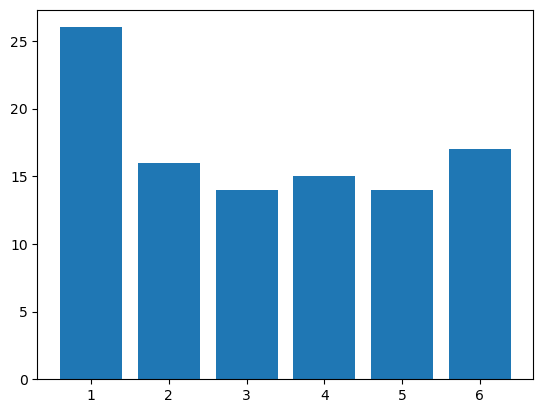

In [10]:
#cool, now lets throw it 100 times and check results
for i in range(100):
    dice.roll()
#after 100 throws by arm hurts :(
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

# OMG 
What happened? we are expecting that the each side of the dice happens the same number of times... what we did wrong? or maybe is a $\textbf{scheme}$!!!!!! is a tricked dice :OOOOOOOO, well let me tell you no, we haven't thrown enough times, probabilities are quite interesting, there the same probability for a number to appear in a deck of cards but sometimes it appears that 2 of hearts comes a lot more that ace of spades. We must investigate and experiment, when we thrown more and more our dice, we will become closer to the probability

Results
1: 38,2: 33,3: 30,4: 28,5: 33,6: 40


<BarContainer object of 6 artists>

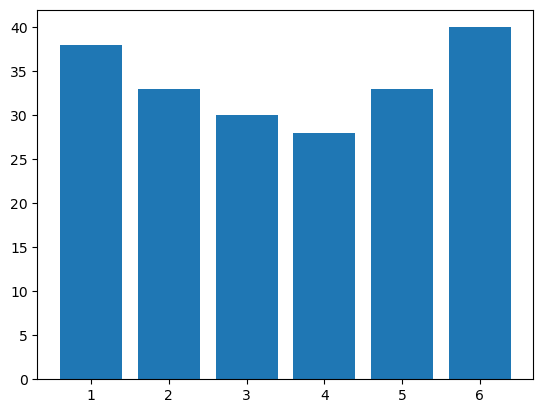

In [11]:
#Lets do another 100
for i in range(100):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

Results
1: 51,2: 49,3: 52,4: 45,5: 45,6: 60


<BarContainer object of 6 artists>

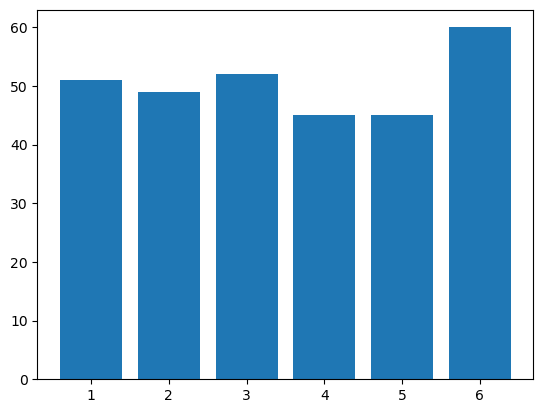

In [12]:
#And Another

for i in range(100):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

Results
1: 72,2: 63,3: 63,4: 61,5: 60,6: 83


<BarContainer object of 6 artists>

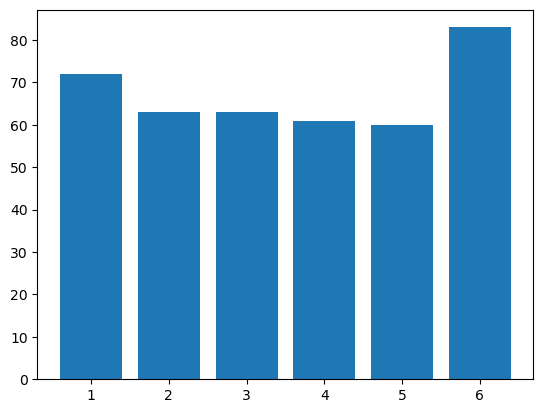

In [13]:
#and another
for i in range(100):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

Results
1: 223,2: 213,3: 250,4: 251,5: 218,6: 247


<BarContainer object of 6 artists>

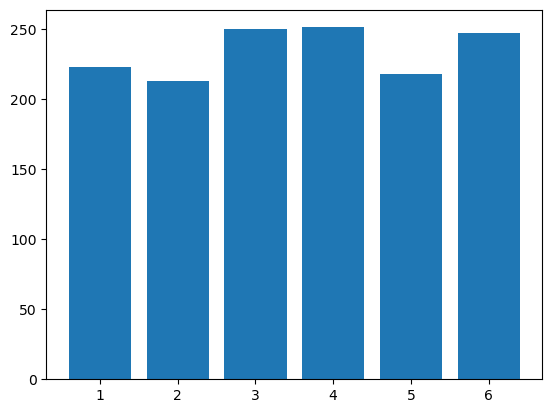

In [14]:
#What the hell lets throw it 1000 times
for i in range(1000):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

Results
1: 391,2: 384,3: 418,4: 436,5: 365,6: 408


<BarContainer object of 6 artists>

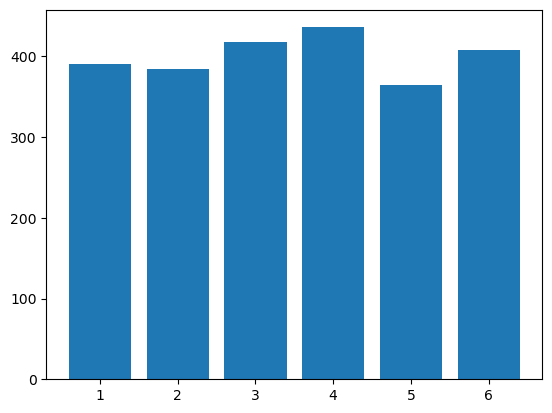

In [15]:
#Another 1000
for i in range(1000):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)


Results
1: 2057,2: 2030,3: 2103,4: 2121,5: 1964,6: 2127


<BarContainer object of 6 artists>

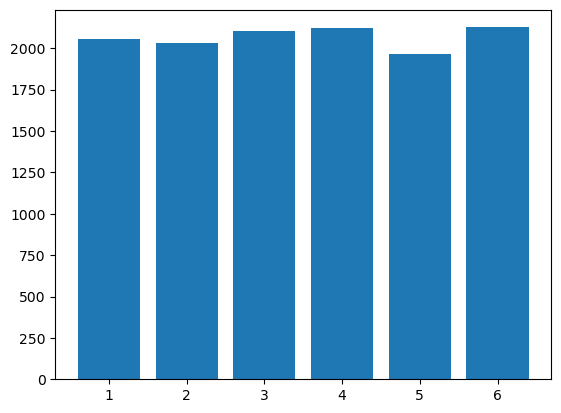

In [16]:
# And another 10000
for i in range(10000):
    dice.roll()
dice.print_results()

#we can visualize this by
fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6],dice.count)

That's more like it :P. Probability is quite tricky and misterius but we can understand it better little by little. Also this is a good way to check if a dice is well balanced, just thrown it 12442 times and see if the numbers are close.

As you can see this, we can see that the PMF for a dice is right (there are more exhaustive ways to prove this but for what we know is enough)

# Continuos Variables and Probability dense function 
Okay! Is not really easier to define continous variable, but we can try to do it with this, the possible values that this variable lies on, often is between a continous interval. Meaning there is infite set of points on which we cannot define a single probability for one of them, only a range of them. Let's try to understand this. Also quick point, PMF for continuos variables are called probability dense functions. (PDF)

Suppose we have a random variable that can be inside the interval (0,1), and we have the same probability for each of the points.

In [17]:
x = np.random.random()
print(x)

0.5611631813275395


Important notes
- All points in the interval are different, meaning 0.5 and 0.50000000001 have the same probability of happening
- It must be true that if we sum all the probabilities inside the whole interval must be 1 also, meaning that the random variable must happen
Suppose that we have that p is the probability of a point, then if we sum off all the points inside (0,1), then its probability must be one then...suppose that we count little by little the number of points in (0,1). On out first count we know there is k points that we know and l that we don't know. But we did a really good job counting so k>>l, so we know that 
$$1\approx p*k$$
Then p
$$p\approx \frac{1}{k}$$
As we keep counting, and adding point by point to k, then as you can see p is getting smaller and smaller.

Well, let me give you a spoiler, even though you cound a point for the rest of you life you are never going to finish counting the points that are inside (0,1), if you want for me to be more severe, there is a point were counting them is not even possible, because you are going to realize that the same number of points that are in (0,1) is also in (0.25,0.5), and little by little. So what is the problem here, as k grows p is getting smaller, and is actually true in this case that
$$\forall x \in (0,1) \implies P(x=x)=0$$

????? What, we know that all the points must sum t 1, but each of them has a probability of 0? well that is the beauty of continous variables, we cannot handle them as discrete, because they don't play with the same rules, we cannot have a probability for as sinlge point (for all points they might be some points that they do but not in all). Thus we use PDF $p(x)$ and this have similar rules actually
$$Domain~of~p~is~X $$ 
$$\forall x\in,p(x\geq 0)~~~~(it's~possible~for~p(x)\geq 1)$$ 
$$\int p(x)dx = 1$$
Thus now the probability is not defined by a sum but by an integral.
Okay now an example.

Let's create first a random variable x that land inside (0,2) with this distribution and PDF
$$p(x) = \frac{x}{2}$$
first if you took calculus you could see that for (0,1) covers all rules that have a continous variable, but we can also see this with a graph

(0.0, 1.0)

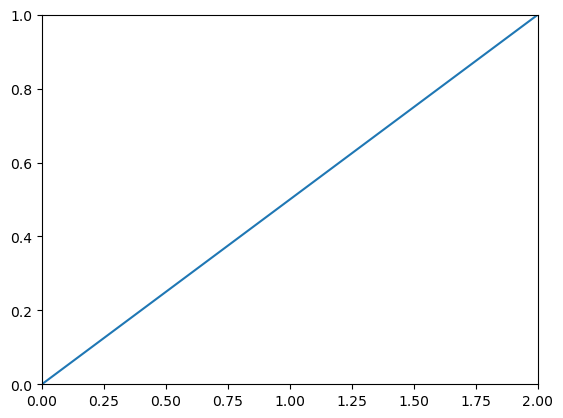

In [18]:
x = np.linspace(0,2,200)
y = ((x/2))
fig,ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim([0,2])
ax.set_ylim([0,1])

As you can see all points lie above the 0 axis and we just have to test that the integral is equal to 1, but we can see this with numpy integrals, (numpy uses the idea of the integral as an area does it works with points)

In [19]:
np.trapz(y,x=x)

1.0

Okay now lets try to do this as we did last time with the dice, this is kinda of tricky with what we have until now but we can try this by creating something similar to an experiment, I am going to give you my line of reasoning to do this in this way, also this line only works to see how the random variable works, to get random variables based on a PDF we are going to have to wait a little bit
1. First is almost impossible (maybe I did not research enough but if you know you can tell me) to do random without a very advance algorithm or a trick, but having a PDF and hoping to get random variables based on only that is quite difficult 
2. We can simplify the process of getting random variables and defining them by what we know already to be pseudo-random with numpy and using the MonteCarlo method (First a simple example is how to calculate the value of pi using it, [Link](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Montecarlo))
3. Well the idea is this, we know that if we have a square of area 1 is the same as the area under the curve, thus if we could in some sense match each point on the square to our curve and throw random points, then we could have a similar distribution, lets go step by step
4.  Lets start by partitioning our curve in different segments, we are going to do this first with big segments and the smaller ones to see how it works. Basically transforming a continuos variable to a discrete one with some restrictions

(0.0, 1.0)

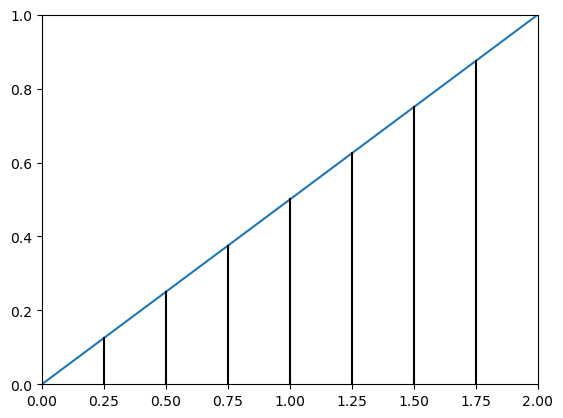

In [20]:
x = np.linspace(0,2,200)
y = ((x/2))
fig,ax = plt.subplots()
ax.plot(x,y)
for i in range(0,8):
    ax.plot([0.25*i,0.25*i],[0,0.125*i],"k-")
    
ax.set_xlim([0,2])
ax.set_ylim([0,1])

5. We know exactly the size of each of this segments, because of the integral (and numpy :P), respectively

Text(0.5, 1.0, 'Partitioning')

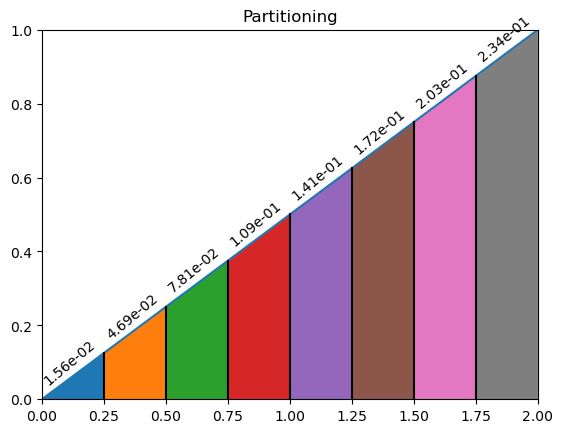

In [21]:
x = np.linspace(0,2,200)
y = (x/2)
fig,ax = plt.subplots()
ax.plot(x,y)
areas = [0]
for i in range(0,8):
    x = np.linspace(0.25*i,0.25*(i+1))
    y = (x/2)
    x_0 = [0.25*i,0.25*i]
    y_0 = [0,0.125*i]
    ax.fill_between(x,y)
    areas.append(np.trapz(x,y))
    ax.text(x_0[0],y_0[1]+0.04,"{:.2e}".format(np.trapz(x,y)),rotation=40)
    ax.plot(x_0,y_0,"k-")
    
ax.set_xlim([0,2])
ax.set_ylim([0,1])
ax.set_title("Partitioning")
#I am very proud of this graph :P

6. Now as we have the areas (you can add all of them and it is 1), we can just divide a unit line in this values and we get

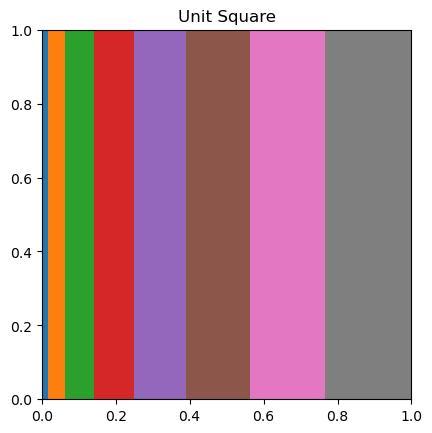

In [22]:
fig,ax = plt.subplots()
areas = areas
current_x = 0
for i in range(len(areas)-1):
    current_x+=areas[i]
    x = np.linspace(current_x,current_x+areas[i+1])
    y = np.ones(len(x))
    x_0 = [2,current_x]
    y_0 = [0,2]
    ax.fill_between(x,y)

ax.set_title("Unit Square")
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_aspect("equal")

7. Seventh and final step, lets drop random points in this (you can actually see that only droping them  based on the x axis will work, while I was doing this I came to noticed it), we can actually use a bar graph to see based on the colors

<BarContainer object of 8 artists>

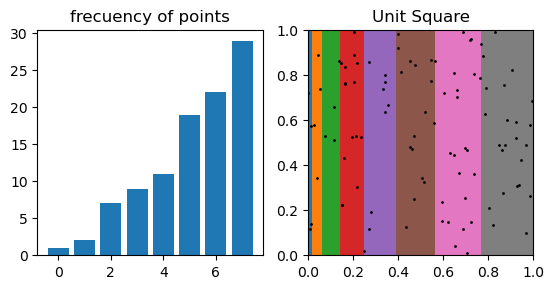

In [23]:
#Lets throw 100 points

fig,axes = plt.subplots(ncols=2)
ax = axes.flat[1]
bar = axes.flat[0]
areas = areas
current_x = 0
sections = []
for i in range(len(areas)-1):
    current_x+=areas[i]
    sections.append([current_x,current_x+areas[i+1]])
    x = np.linspace(current_x,current_x+areas[i+1])
    y = np.ones(len(x))
    x_0 = [2,current_x]
    y_0 = [0,2]
    ax.fill_between(x,y)

ax.set_title("Unit Square")
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_aspect("equal")
bar.set_title("frecuency of points")
bar.set_box_aspect(1)
x_values = np.zeros(8)
for i in range(100):
    y=np.random.random() 
    x=np.random.random() 
    ax.scatter(y,x,color ='black',s=1)
    for i in range(len(sections)):
        if(sections[i][0]<x and sections[i][1]>=x):
            x_values[i]+=1

bar.bar(range(8),x_values)

As we can see with few points this does not appear as our distribution so lets throw more points  

<BarContainer object of 8 artists>

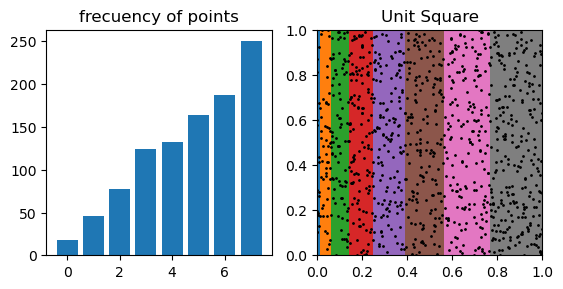

In [24]:
#Lets throw 1000 points

fig,axes = plt.subplots(ncols=2)
ax = axes.flat[1]
bar = axes.flat[0]
areas = areas
current_x = 0
sections = []
for i in range(len(areas)-1):
    current_x+=areas[i]
    sections.append([current_x,current_x+areas[i+1]])
    x = np.linspace(current_x,current_x+areas[i+1])
    y = np.ones(len(x))
    x_0 = [2,current_x]
    y_0 = [0,2]
    ax.fill_between(x,y)

ax.set_title("Unit Square")
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_aspect("equal")
bar.set_title("frecuency of points")
x_values = np.zeros(8)
bar.set_box_aspect(1)
for i in range(1000):
    y=np.random.random() 
    x=np.random.random() 
    ax.scatter(y,x,color ='black',s=1)
    for i in range(len(sections)):
        if(sections[i][0]<x and sections[i][1]>=x):
            x_values[i]+=1

bar.bar(range(8),x_values)

We can see that this works quite well, and as you now you can send more point but my code in this case because of the graphs can be a little tedius, so lets skip the part of drawing the unit square and only do the points 

In [25]:
#Lets create a function
def throw_n_points(axes,n):
    areas = []
    current_x = 0
    sections = []
    for i in range(0,8):
        x = np.linspace(0.25*i,0.25*(i+1))
        y = (x/2)
        x_0 = [0.25*i,0.25*i]
        y_0 = [0,0.125*i]
        areas.append(np.trapz(x,y))
    for i in range(len(areas)-1):
        current_x+=areas[i]
        sections.append([current_x,current_x+areas[i+1]])
    bar = axes
    current_x = 0
    bar.set_title("frecuency of points")
    x_values = np.zeros(7)
    bar.set_box_aspect(1)
    for i in range(n):
        y=np.random.random() 
        x=np.random.random() 
        for i in range(len(sections)):
            if(sections[i][0]<x and sections[i][1]>=x):
                x_values[i]+=1
    bar.bar(range(7),x_values)

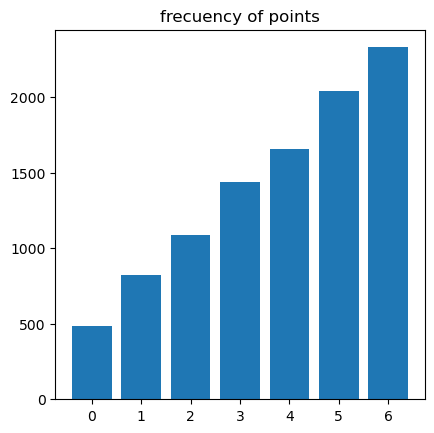

In [26]:
#Lets throw 20000 times
fig,ax = plt.subplots()
throw_n_points(ax,10000)

This is very near our distribution, if you want you can divide in more and more sections and will that you will reach your desire distribution.

Okay so lets be clear to what we have done, we got a random continous variable with a domain of (0,2) and a PDF, we wanted to make an experiment that have this random variable, so we simplified the problem by meking it in some sense discrete, and we use python random numbers that we know to have a distribution where each point have the same probability and we use them to get our desire distribution... wow, that was nice but really tiresome, can this be done easier, yes!!! Actually there is a very easy way to do this, it is called Cummulative distribution function, this topic is not on the book but is quite usefull :D

# Cummulative distribution function 
Lets suppose we have a random continous variable with a domain $\mathbb{R}$ and a PDF $p(x)$, we denote the cummulative distribution function as 
$$CDF(x) = \int_{-\infty}^{x} p(x) dx$$
That means we have the probability of our variable to be at most x, is quite interesting as if you can see what we did before, we essentially did this but for some sections, so let's suppose we want the probability that is in the segment [0,1] we can calculate this by using
$$P(x\in (0,1)) = CDF(1)-CDF(0)$$
That is going to be what is the probability that whenever we throw a point in this unit square is going to land in the area that corresponds to the section between (0,1)

With our example
$$CDF(x) = \frac{x^2}{4}$$
Then for our random variable to be at most 1, (in our case as is only define in (0,2) is going to be the probability of being between (0,1)), is going to be
$$CDF(1)-CDF(0) = 0.25$$
And as I said, this is going to be usefull getting this random numbers based on a PDF, well, I will leave it to you to see why, but if we have a random variable with a PDF, in python we can get random variables that have this distribution by
$$CDF^{-1}(uniformly_random_variable)$$
If you want a hint, remember the unit square, how can did we set up the areas and suppose know that you have a point and want to get the area that divides the the graph, what is the inverse of the CDF in that case, and what is a random uniform in that

<BarContainer object of 8 artists>

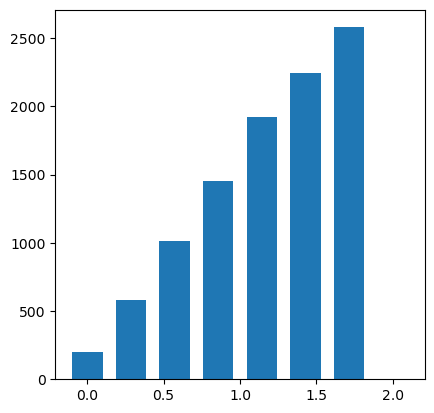

In [27]:
#For completion lets use the inverse in our example 
def inverse_f(x):
    return np.sqrt(x*4)
fig,bar = plt.subplots() 

bar.set_box_aspect(1)
x_values = np.zeros(8)

x = np.linspace(0,2,8)
for _ in range(10000):
    r = np.random.random()
    r = inverse_f(r)
    for i in range(len(x)-1):
        if(x[i]<r and x[i+1]>=r):
            x_values[i]+=1
bar.bar(x,x_values,width=0.2) 

We get a similar distribution

# Marginal Probabilities
Suppose that in an experiment there are two variables, x and y, both of which are random, the experiment is thus define by how those two random variables work between each other, we have actually seen this before in the unit_square, we have the random variable x and the random variable y 

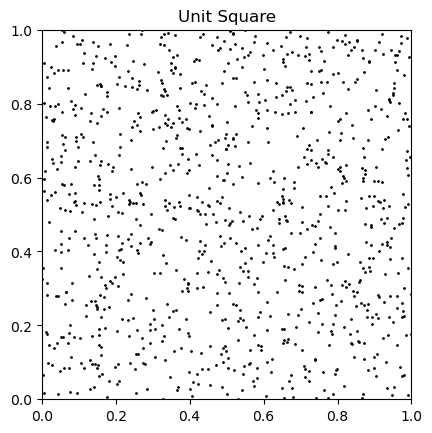

In [28]:
fig,axes = plt.subplots()
ax = axes
ax.set_title("Unit Square")
ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.set_aspect("equal")
x_values = np.zeros(8)
for i in range(1000):
    y=np.random.random() 
    x=np.random.random() 
    ax.scatter(y,x,color ='black',s=1)

As you can see is random both in x and in y. Lets start with discrete cases, lets suppose we want to only know how the distribution works for only one variable, well first we have a Probability Mass function that is define by x and y then
$$P(x,y)$$
we can then simplify this to only the variable x by in some sense grouping all cases of x without taking in consideration y, how? well 
$$P(x) = \sum_{y}P(x,y=y)$$
And as you might suppose is the same for continous
$$P(x) = \int_{y}P(x,y=y)dy$$
There is really nice way for seeing this, suppose we have a checkers set and we want to know in which column is more likely to be a random piece

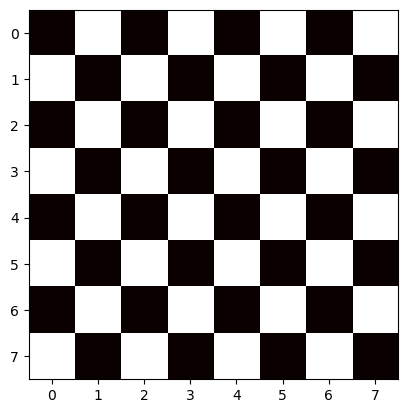

In [29]:
z = np.zeros([8,8])
for i in range(8):
    for j in range(8):
        if((i+j)%2):
            z[i][j] = 1
plt.imshow(z,cmap="hot")

Suppose we place random pieces above many squares

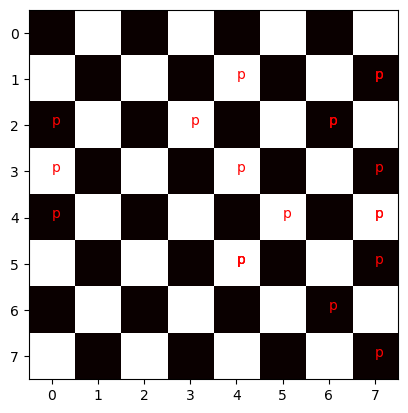

In [30]:
z = np.zeros([8,8])
for i in range(8):
    for j in range(8):
        if((i+j)%2):
            z[i][j] = 1

#place 20 random ones
save_x_y = []
for _ in range(20):
    y = np.random.randint(8)
    x = np.random.randint(8)
    save_x_y.append([x,y])
    plt.text(x,y,"p",color="red")

plt.imshow(z,cmap="hot")

As you can see P are randomly distributed by x and y, but we want only the columns, thus what we do is this

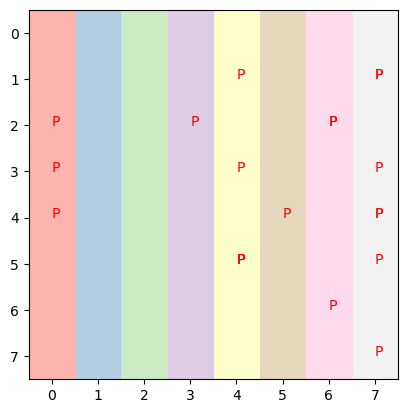

In [31]:
z = np.zeros([8,8])
for j in range(0,8):
    for i in range(8):
        z[i][j] = 0.1*j
        
for x,y in save_x_y:
    plt.text(x,y,"P",color="red")

plt.imshow(z,cmap="Pastel1")

We count the number of P's that are in each column and we are left with
$$[4,1,2,2,1,2,3,2]$$
Thus we can work with this, to focus only on columns!, if you take another look at the function that I just show you about marginal probability you can see that is exactly the same 

# Conditional Probability
As we now there are some events that might depend on multiple random variables (in real life most of them do :P). In the last part we answer the question "What if we only care about one variable?" now we are going to answer, "What if I know the value of one variable, but not the other, how can I get this distribution?" well, suppose that we have x,y as random variables, and P(x,y) the functions that model this, and suppose we know that the variable x is a value $x_o$, then the distribution of for y will be like this
$$P(y=y|x=x_o) = \frac{P(y,x=x_o)}{P(x=x_o)}$$
before moving on, lets just focus on the equation, $P(x=x_o)$ is simple, is the probability of $x=x_o$ this we can obtain by our marginal function that we discover in the last section. $(P(y,x=x_o))$ is the distribution od y and $x_o$ happening, this might be confusing, as you might think is the same as we want to discover originally, but no... please be carefull with wording, we want to understand the distribution of y if we know for sure that $x_o$ happened, is different that saying what is the probability of $x_o$ happening

Let's check and example with the checkers before, but know we know that the piece in column 3 and want to find the distribution for what row the piece is

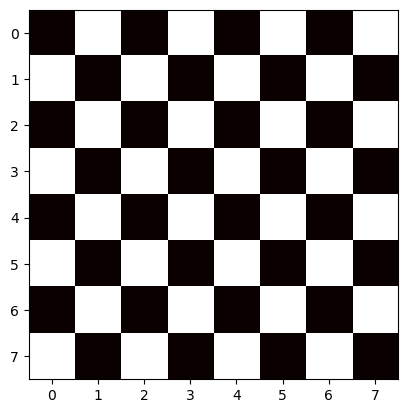

In [32]:
#Our board
z = np.zeros([8,8])
for i in range(8):
    for j in range(8):
        if((i+j)%2):
            z[i][j] = 1

plt.imshow(z,cmap="hot")

Now lets add random ones that we know for it to be in column 3

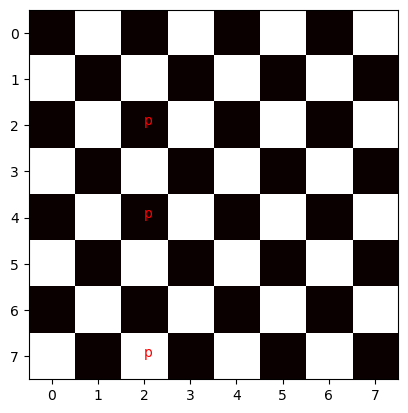

In [33]:
z = np.zeros([8,8])
for i in range(8):
    for j in range(8):
        if((i+j)%2):
            z[i][j] = 1

#place 20 random ones
save_x_y = []
for _ in range(3):
    y = np.random.randint(8)
    x = 2
    save_x_y.append([x,y])
    plt.text(x,y,"p",color="red")

plt.imshow(z,cmap="hot")

As you can see it appears that the case simplifies as we know that in the third column lies our pieces, what conditional ditribution lets us do is focus ourselves in what we know or what it matters to us is like  

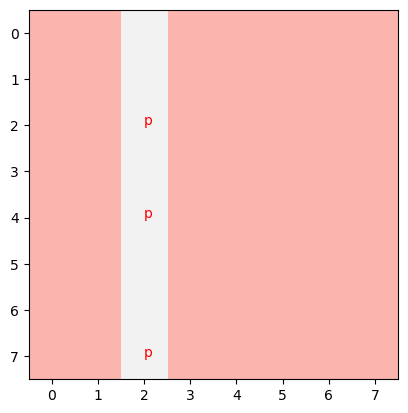

In [34]:
z = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        if((i+j)%2):
            z[i][j] = 0
        if(not j==2):
            z[i][j] = 0.2
        else:
            z[i][j] = 0.5
            

#place 20 random ones
for x,y in save_x_y:
    plt.text(x,y,"p",color="red")

plt.imshow(z,cmap="Pastel1")

What is different from before, well, is like we don't care about anything else other than that column, that is conditional, if we know something only focus on it

# The Chain Rule of Conditional Probabilities
About this topic I have not a lot to say as you can read it in the book and you can see 

# Independence and Conditional Independence
For this I want to just add one thing, we know that two variables are independent from each other if
$$\forall x\in\Omega_x,y\in\Omega_y, p(x=x,y=y) = p(x=x)p(y=y)$$
But what does that mean? Is the case when you have two variables that the change of one does not affect the other, suppose for example that we have our last example, you could see that actually we could pick any of the squares independently of the board, and the randomness in the pieces depends in y and in x, but x and y are completely independent, you could analyze columns alone, or rows alone and nothing would be affected.

Some other examples: 
- Imagine you have a model were you have to throw a coin and a dice, the domain is the tuple of the dice and the coin, but as you know, if you only analyze the coin separately from the dice is exactly managable and it works as we suppose for a independent variable
- Now suppose you get a machine that throw the dice in different random heights, you have two variables, the height and the value of the dice when it lands, is you try to separate each variable as independant it would simply not match the original model 

# Expectation, Variance and Covariance
For this topic I will also leave it most for you to read the book, but I will add some ways to calculate when you have some random data using our favorite database and data management library pandas

In [35]:
import pandas as pd #New library :D

In [36]:
series = pd.Series([0,1,2,3,4,5])
series

0    0
1    1
2    2
3    3
4    4
5    5
dtype: int64

In [37]:
series1 = pd.Series([0,1,2,3,4,5])

In [38]:
dataframe = pd.DataFrame([series,series1])
dataframe

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,0,1,2,3,4,5


In [39]:
#Expectation
series.mean()

2.5

In [40]:
#variance
series.var()

3.5

In [41]:
#covariance
np.cov(series,series1)

array([[3.5, 3.5],
       [3.5, 3.5]])

# Common distributions and functions 
In this case I will add the distributions and try to graph it

# Bernoulli distribution 
In numpy we use what is called the binomial, lets use p = 0.25

In [42]:
# for 100 cases
values = np.random.binomial(100,p=0.3)
print(values)

25


<BarContainer object of 101 artists>

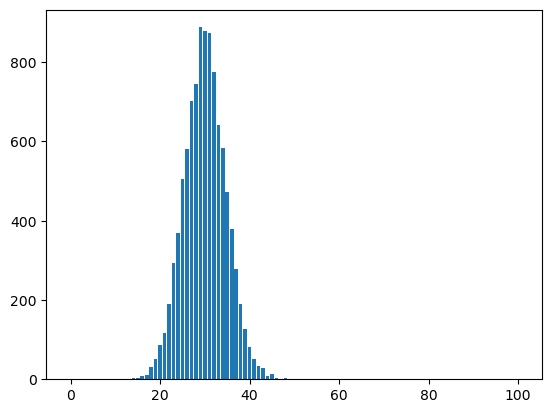

In [43]:
values = np.linspace(0,100,101)
frec = np.zeros(101)
for _ in range(10000):
    x = np.random.binomial(100,p=0.3)
    for ran in range(101):
        if( values[ran]<=x and values[ran+1])>x:
            frec[ran]+=1
            continue
    
fig,ax = plt.subplots()
ax.bar(values,frec)

Just to understand what this graph means, if you have an experiment that is to get 1 or 0, you are going to get 1 based on this distribution, meaning that in the majority of cases you are going to get around 0.3. This is clear when you see the expected value is going to be $\theta$ times the number of oportunities, and in this case 0.3 * 100, thus 30

# Multinoulli Distribution
Do you remember the case of the Dice? the that is a multinoulli distribution, where each state have a 1/6 probability 

In [44]:
dice = np.random.multinomial(20, [1/6.]*6, size=1)
print(dice)
# [[ 4 1 3 6 3 3 ]] it landed 4 times in 1, 1 time in 2 and as such for the others

[[2 2 3 5 5 3]]


# Gaussian Distribution or normal distribution
This is most common one and the one you must have seen around (you just saw it above :D, it was a spoiler), it is based on a mean and a standard deviation, it is called the Gaussian distribution, named after the famous mathematician Euler... silly joke :D, Gauss was a genious that literally worked in everything [Link](https://www.youtube.com/watch?v=hZS4gyerfuw), the video is in spanish but there are auto-subtitles
$$
  X \sim \mathcal{N}(\mu,\,\sigma^{2})\,.
$$ 
The PDF for this distribution is
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi} } e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$
when we said the $\sigma = 1$ and the $\mu=0$ we called the standard normal distribution

In [45]:
# standard normal distribution
x = np.random.normal()
x

-0.1882121508196319

In [46]:
# normal distribution with especified values
x = np.random.normal(loc = 1, scale=2)
x

1.5139174484297504

We can set up an experiment to check the distributions, by getting a lot of points done with this distribution and check if they match their curve

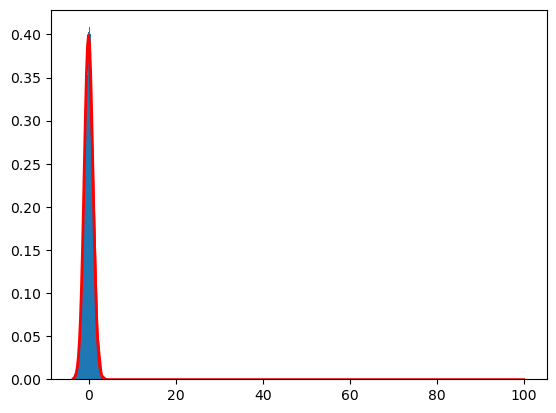

In [49]:
from scipy.stats import norm
#standard normal distribution
x_random = np.random.normal(0,1,10000)
# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / (2 * 1) ),

         linewidth=2, color='r')
ax.plot(values, norm.pdf(values, 0, 1),color="red") 

Text(0.5, 1.0, 'mean = 4,sigma = 2')

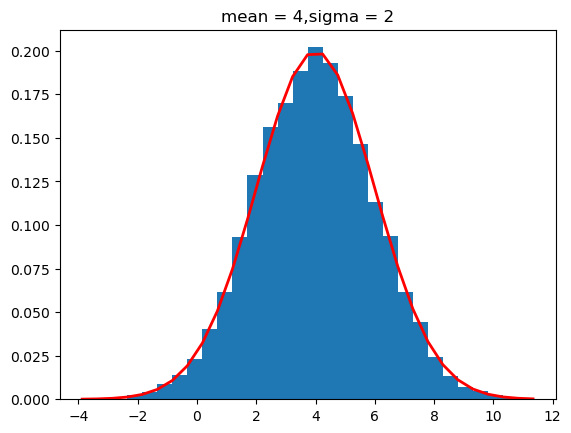

In [50]:
sigma = 2
mu = 4
x_random = np.random.normal(mu,sigma,10000)

# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 30, density=True)
ax.plot(bins, 1/(sigma*np.sqrt(2 * np.pi)) *
               np.exp( - (bins-mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')
ax.set_title(f"mean = {mu},sigma = {sigma}")

As you can tell, the curve appears to have moved that is because change the mean, the mean works as the center of the curve. I am going to place the original curve on the side so you can see something interesting

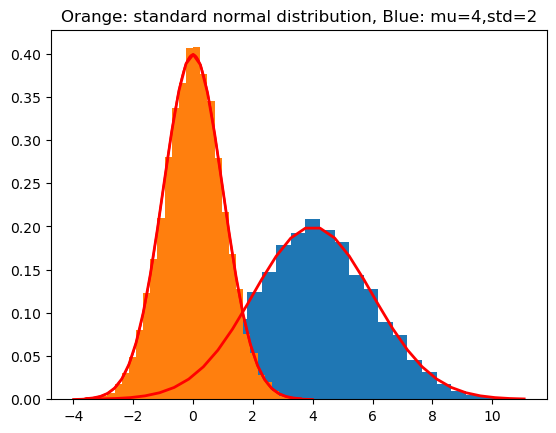

In [51]:
sigma = 2
mu = 4
x_random = np.random.normal(mu,sigma,10000)
# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 30, density=True)
ax.plot(bins, 1/(sigma*np.sqrt(2 * np.pi)) *
               np.exp( - (bins-mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')
ax.set_title(f"Orange: standard normal distribution, Blue: mu={mu},std={sigma}")
values = np.linspace(-4,4,201)
frec = np.zeros(201)

x_random = np.random.normal(0,1,10000)

count, bins, ignored = plt.hist(x_random, 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / (2 * 1) ),

         linewidth=2, color='r')
ax.plot(values, norm.pdf(values, 0, 1),color="red") 

As you can see the original one appears to be more "narrow, that is because the standard distribution alters this aspect, lets do the same but not changing the standard distribution of the blue one

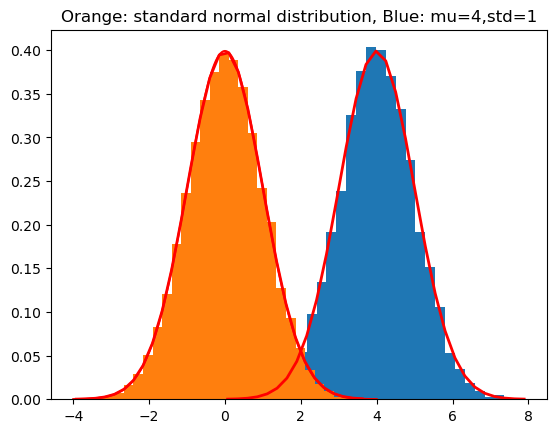

In [52]:
sigma = 1
mu = 4
x_random = np.random.normal(mu,sigma,10000)
# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 30, density=True)
ax.plot(bins, 1/(sigma*np.sqrt(2 * np.pi)) *
               np.exp( - (bins-mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')
ax.set_title(f"Orange: standard normal distribution, Blue: mu={mu},std={sigma}")
values = np.linspace(-4,4,201)
frec = np.zeros(201)

x_random = np.random.normal(0,1,10000)

count, bins, ignored = plt.hist(x_random, 30, density=True)
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) *
               np.exp( - (bins)**2 / (2 * 1) ),

         linewidth=2, color='r')
ax.plot(values, norm.pdf(values, 0, 1),color="red") 

They are the same curve just moved

# Exponential and Laplace distribution


First the exponential is define by
<math>
\begin{equation}
f_X(x) = 
\begin{dcases}
\lambda \mathrm{e}^{-\lambda x} & x > 0 \\
0 & \text{otherwise.}
\end{dcases}
\end{equation}</math>

Text(0.5, 1.0, 'mean = 4,sigma = 1')

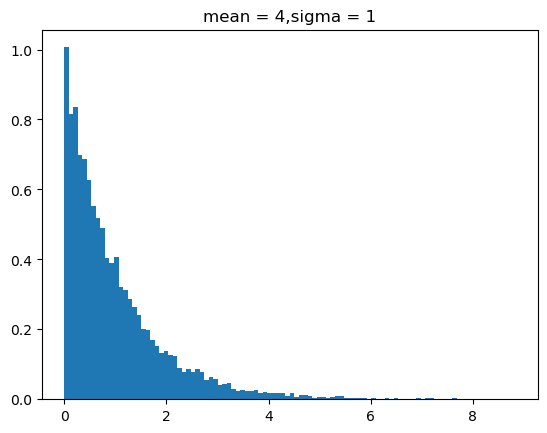

In [53]:
x_random = np.random.exponential(size=10000)
# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 100, density=True)
ax.set_title(f"mean = {mu},sigma = {sigma}")

And for the Laplace transformation
$$
F(x|\theta,\lambda)=\frac{1}{2\lambda}exp\left(-\frac{|x-\theta|}{\lambda}\right),when\left(x\leq\theta\right).
$$

Text(0.5, 1.0, 'mean = 4,sigma = 1')

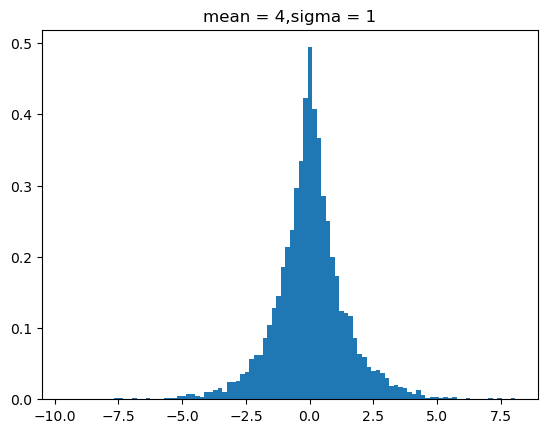

In [54]:
x_random = np.random.laplace(size=10000)
# Calculating mean and standard deviation 
fig,ax = plt.subplots()
count, bins, ignored = plt.hist(x_random, 100, density=True)
ax.set_title(f"mean = {mu},sigma = {sigma}")

# Useful properties of useful functions

# Logistic Sigmoid
This functions are very usefull because of its domain, its range and sometimes its relation between them
$$
 \sigma(x) = \frac{1}{1 + e^{-x}}
 $$

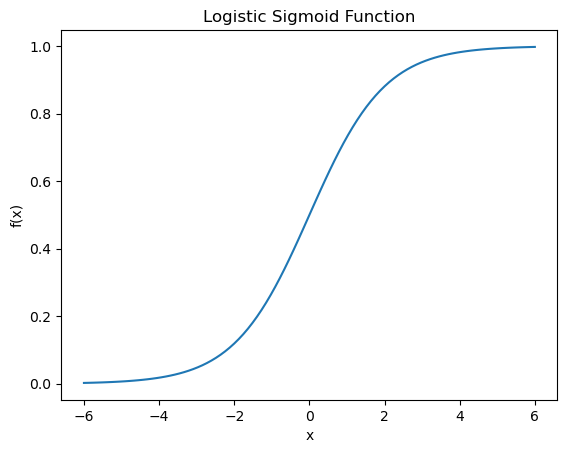

In [55]:
def log_sig(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-6, 6, 100)
y_values = log_sig(x_values)

plt.plot(x_values, y_values)
plt.title('Logistic Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# Softplus functions
$$f(x) = \log(1 + e^x)$$

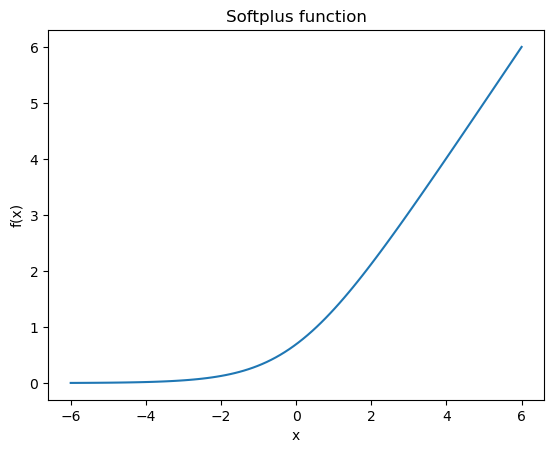

In [56]:
def softplus(x):
    return np.log((1 + np.exp(x)))

x_values = np.linspace(-6, 6, 100)
y_values = softplus(x_values)

plt.plot(x_values, y_values)
plt.title('Softplus function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Now there are many properties in the book that relates softplus and logistic sigmoid, most of them are descriptive alone, so I will not write more about them


# Bayes' Rule
This is actually quite interesting one, we are going back to probabilities as before, thus checkers. Suppose we want to calculate the conditional probability of some case like 
$$P(x|y)$$ 
But in our experimentation the only thing we could obtain was $P(y|x)$, then Bayes discover the following formula that relate both of them

$$P(x|y) = \frac{P(x)P(y|x)}{P(y)}$$ 

There are many examples

# Information Theory!
Being completely honest, was getting kinda tired of talking about probabilities :D, but we can move on. Information theory is really well explained in the book but we could make some examples. We are going to use the self-information function first
$$I(x) = -log P(x)$$
Were It defines the information that a message gives based on the probability of the event that it states, we use units, to say how many units of information a message gives

Suppose we have this experiment: (Schrodinger's not relativistic cat :D)
1. We have a machine that has a cat inside of it
2. The cat can be sleeping, eating or drinking
3. The machine gives the message of what the cat is doing
4. After many tries, (no cats were harmed during this hypothetical case), we found that the cat has a probability of 0.7 of sleeping, a 0.2 of drinking and 0.1 of eating.
5. We watch the machine every hour

Well suppose that the machine says "sleeping", just seeing the probability we can say "oh the cat is sleeping, that what we expect", why? because it has the highest probability
$$P(sleeping) = 0.7$$
So if the machine gives us that message there is really not a lot of information that we should not expect 

In [57]:
-np.log(0.7)

0.35667494393873245

But after many hours watching the machine, the message changes to "drinking". OMG, the cat change its state, OMG is drinking, there is not much of a change that is doing that, let's calculate how much info that gives us

In [58]:
-np.log(0.2)

1.6094379124341003

Wowwwww ~1.6 of information, amazing, but wait <big>OMG</big> the message changes... "eating", that is impossible, very rarely the cat eats, that message gave us a lot of information

In [59]:
-np.log(0.1)

2.3025850929940455

2.3 units of information, amazing. That is in simple terms what information theory is about. We know some events are more likely to happen, so when someone gives us the message that a probable event happens it does not give a lot of information. But when the message notifies us about a very unlikely event we give a lot more importance to that message.

There is a way more exagerated example, suppose there is a 0.999 chance that the sun comes out on the morning, thus the message "today the sun rose up" we are just gonna say "Meh, we know that will happen"

In [60]:
-np.log(0.999)

0.0010005003335835344

Less than 0.01 units of information, but the day comes, and the message is "Today the sun did not appeared"... omg, the information that message gave was incredible, how, we were expecting the sun to be in the sky but it isn't. 

In [61]:
-np.log(0.001)

6.907755278982137

~7 units of information. That is increible, we can see in the graph that as more unlikely the event is, the more information we are going to get when the message is received

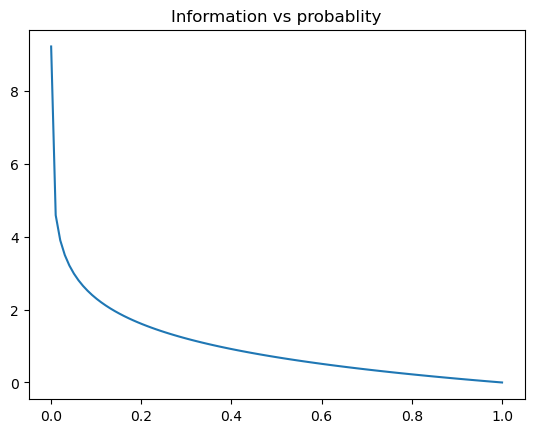

In [62]:
x = np.linspace(0.0001,1,100)
y = -np.log(x)
plt.title("Information vs probablity")
plt.plot(x,y)

# Kullback-Leibler(KL) divergence 
I am going to cite a text that one student of mine put in an exam

"In practical terms, you can interpret the KL divergence as the extra amount of information needed (measured in bits if the logarithm base is 2) to encode samples from p using a code optimized for q compared to a code optimized for p. It's often used in various fields such as statistics, machine learning, and information theory to compare probability distributions." 

I ask him and he used chat GPT, but I give him half because... I liked it haha (the bits part gave it away as we were working in log as natural logarithm).

The idea is simple suppose we have two distribution P x) and Q(x) over the same x, we can measure how much that probabilities differ from each other.

I am going to use a really simple example. Suppose we have a simple coin with a perfecto probability of 0.5 tails and 0.5 heads. We have those theoretically probabilities, but we don't trust it so we are going to run some experiments, we are going to use frecuency as a way to define the probabilities. We have some probabilities after throwing the coin n times

- 4 throws, 0.25 head and 0.75 tails
- 20 throws, 0.35 head and 0.65 tails
- 100 throws, 0.4 head and 0.6 tails
- 1000 throws, 0.49 head and 0.51 tails

In [66]:
# KL divergence
def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

theoretical = np.array([0.5,0.5])
n_4 = np.array([0.25,0.75])
n_20 = np.array([0.35,0.65])
n_100 = np.array([0.4,0.6])
n_1000 = np.array([0.49,0.51])

In [67]:
print(kl_divergence(theoretical,n_4))
print(kl_divergence(theoretical,n_20))
print(kl_divergence(theoretical,n_100))
print(kl_divergence(theoretical,n_1000))

0.14384103622589042
0.04715533973562064
0.020410997260127586
0.00020004001066985765


As you can see, as closer the probablities are the less divergent between each other are!, when we throw more and more times, is more closer to what theoretically the case is. This is a good way to test theoretically you experiments, let's suppose that they gave us a weighted coin and we don't know, so we run the experiment and as you can see the divergence goes higher because it is not true that the coin has a 50/50 probability

In [69]:
theoretical = np.array([0.5,0.5])
n_20 = np.array([0.35,0.65])
n_100 = np.array([0.32,0.68])
n_1000 = np.array([0.28,0.72])

print(kl_divergence(theoretical,n_20))
print(kl_divergence(theoretical,n_100))
print(kl_divergence(theoretical,n_1000))

0.04715533973562064
0.0694012014402294
0.10758769083251637


Thus it appears that they diverge!

This topic ends probabilites for my part because
## Structured Probabilistic Models
Is a very good topic to talk when we have a more complex example and any example that I give will simplied to many theoricals concepts